# Çizgi Grafikleri
Tahmini süre: 30 dakika

Bu laboratuvar çalışmasında, bir veri kümesindeki farklı kategorilerde ve zaman içindeki eğilimleri analiz etmek için çizgi grafiklerini kullanmaya odaklanacaksınız.

Hedefler
Bu laboratuvar çalışmasında şunları gerçekleştireceksiniz:

Yaş grupları ve belirli yaş aralıkları genelinde ücretlendirme eğilimlerini izlemek.

Deneyim düzeyine göre iş memnuniyeti eğilimlerini analiz etmek.

Desenleri ve eğilimleri belirlemek için çizgi grafiklerini incelemek ve yorumlamak.

***Kurulum: Veritabanı ile Çalışma
Gerekli kütüphaneleri yükleyin***

In [11]:
!pip install pandas
!pip install matplotlib
!pip installt seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

ERROR: unknown command "installt" - maybe you meant "install"


Anket verilerini içeren veritabanı dosyasını indirin ve ona bağlanın.

Başlamak için, veri setini indirin ve bir pandas DataFrame'ine yükleyin.

Adım 1: Veri setini indirin

In [2]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2026-01-30 12:23:29--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  56.3MB/s    in 2.7s    

2026-01-30 12:23:32 (56.3 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



In [3]:
df = pd.read_csv("survey-data.csv")

In [4]:
pd.set_option('display.max_columns', None)
df.head(20)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

## Görev 1: Yaş Gruplarına Göre Ücretlerdeki Eğilimler
***1. Yaş Gruplarına Göre Yıllık Ortalama Ücretin (ConvertedCompYearly) Çizgi Grafiği***

Farklı yaş gruplarında yıllık ortalama ücretin (ConvertedCompYearly) nasıl değiştiğini takip edin.

Bu eğilimleri görselleştirmek için bir çizgi grafiği kullanın.

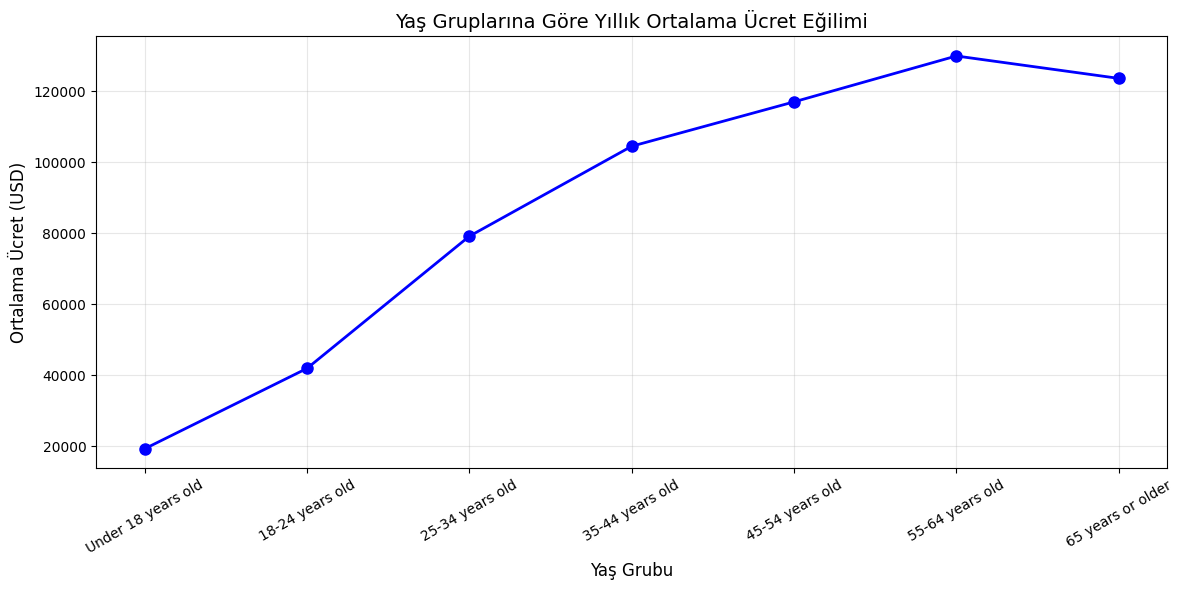

In [12]:
# 1. Veritabanı Bağlantısı ve Yükleme
conn = sqlite3.connect(':memory:')
df.to_sql('survey_table', conn, index=False, if_exists='replace')

# 2. SQL Sorgusu: Yaş gruplarına göre ortalama maaşı çekelim
query1 = """
SELECT Age, AVG(ConvertedCompYearly) as Ortalama_Maas
FROM survey_table
WHERE Age IS NOT NULL 
  AND Age != 'Prefer not to say' 
  AND ConvertedCompYearly IS NOT NULL
GROUP BY Age
"""
df_age_line = pd.read_sql_query(query1, conn)

# 3. Mantıklı Sıralama (Eğilim çizgisi için şarttır)
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
df_age_line['Age'] = pd.Categorical(df_age_line['Age'], categories=age_order, ordered=True)
df_age_line = df_age_line.sort_values('Age')

# 4. Görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(df_age_line['Age'].astype(str), df_age_line['Ortalama_Maas'], 
         marker='o', linestyle='-', color='blue', linewidth=2, markersize=8)

plt.title('Yaş Gruplarına Göre Yıllık Ortalama Ücret Eğilimi', fontsize=14)
plt.xlabel('Yaş Grubu', fontsize=12)
plt.ylabel('Ortalama Ücret (USD)', fontsize=12)
plt.xticks(rotation=30)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

***2.

25-45 Yaş Arası Katılımcılar İçin Yıllık Ortanca Dönüştürülmüş Ücretin Çizgi Grafiği
Daha yakından incelemek için, 25-45 yaş arası katılımcıların ortanca ücretine odaklanan bir çizgi grafiği çizin.***

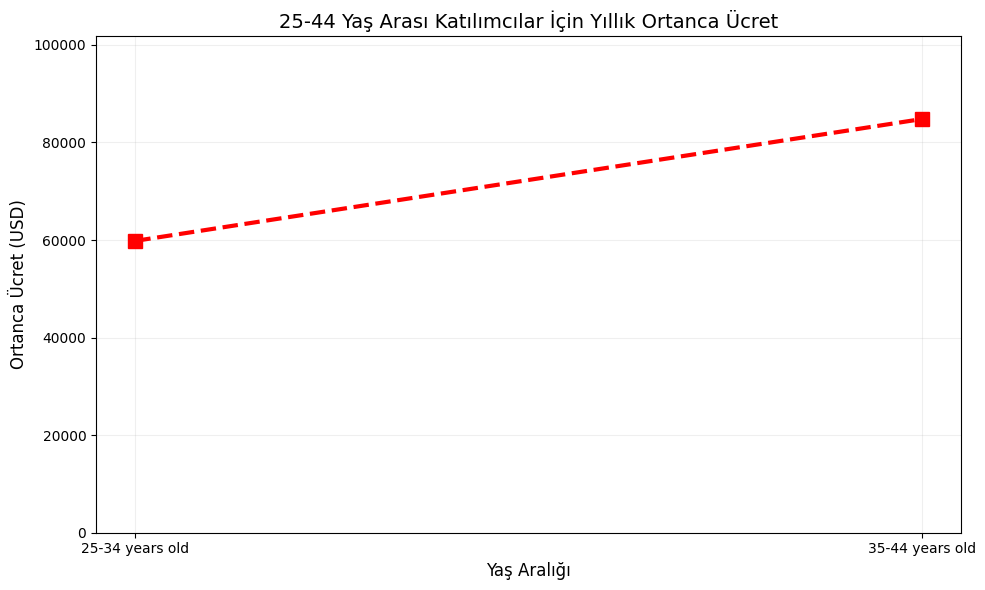

In [13]:
query2 = """
SELECT Age, ConvertedCompYearly
FROM survey_table
WHERE Age IN ('25-34 years old', '35-44 years old') 
  AND ConvertedCompYearly IS NOT NULL
"""
df_2545_raw = pd.read_sql_query(query2, conn)

# 2. Ortanca (Median) Hesaplama
df_2545_median = df_2545_raw.groupby('Age')['ConvertedCompYearly'].median().reset_index()
df_2545_median['Age'] = pd.Categorical(df_2545_median['Age'], categories=['25-34 years old', '35-44 years old'], ordered=True)
df_2545_median = df_2545_median.sort_values('Age')

# 3. Görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(df_2545_median['Age'].astype(str), df_2545_median['ConvertedCompYearly'], 
         marker='s', linestyle='--', color='red', linewidth=3, markersize=10)

plt.title('25-44 Yaş Arası Katılımcılar İçin Yıllık Ortanca Ücret', fontsize=14)
plt.xlabel('Yaş Aralığı', fontsize=12)
plt.ylabel('Ortanca Ücret (USD)', fontsize=12)
plt.grid(True, alpha=0.2)
plt.ylim(0, df_2545_median['ConvertedCompYearly'].max() * 1.2) # Grafik netliği için limit
plt.tight_layout()
plt.show()


## Görev 2: Deneyim Seviyesine Göre İş Memnuniyetindeki Eğilimler
***1. Deneyim Seviyesine Göre İş Memnuniyetinin Çizgi Grafiği (JobSatPoints_6)**

Deneyim seviyesini yaklaşık olarak temsil eden bir sütun kullanarak, iş memnuniyetinin deneyimle nasıl değiştiğini analiz edin.

Gerekirse, Deneyim sütunu yerine mevcut deneyimle ilgili bir sütun kullanın


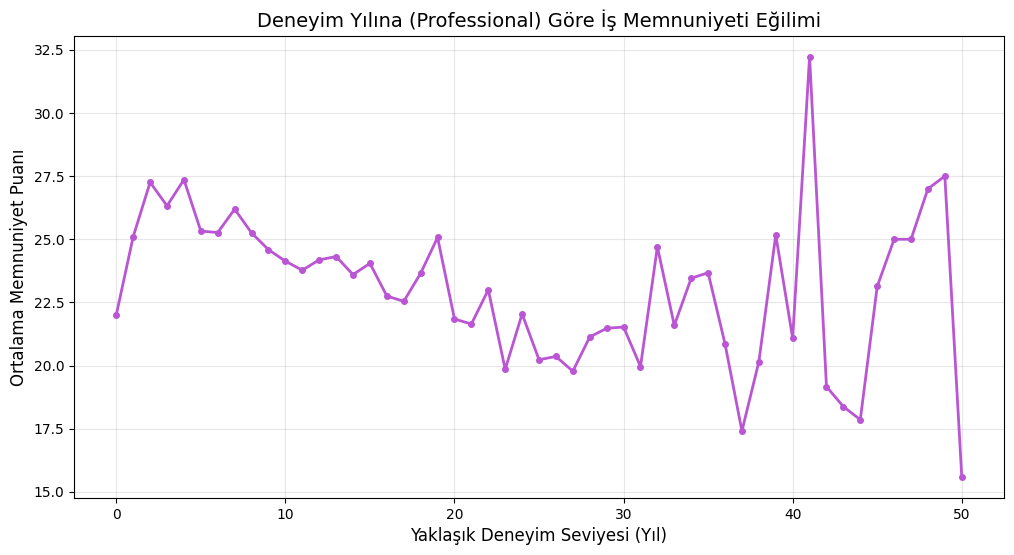

In [19]:
# 1. Veriyi Hazırlama ve Deneyim Sütununu Sayısallaştırma
# 'YearsCodePro' sütununu yaklaşık deneyim seviyesine çeviriyoruz
def clean_experience(x):
    if x == 'Less than 1 year': return 0
    if x == 'More than 50 years': return 50
    try:
        return float(x)
    except:
        return None

df['YearsCodeProNumeric'] = df['YearsCodePro'].apply(clean_experience)

# 2. SQL Veritabanına Yükleme
conn = sqlite3.connect(':memory:')
df.to_sql('survey_table', conn, index=False, if_exists='replace')

# Deneyim arttıkça memnuniyetin (JobSatPoints_6) nasıl değiştiğini çekiyoruz
query_sat = """
SELECT YearsCodeProNumeric as Deneyim, 
       AVG(JobSatPoints_6) as Ortalama_Memnuniyet
FROM survey_table
WHERE Deneyim IS NOT NULL AND JobSatPoints_6 IS NOT NULL
GROUP BY Deneyim
ORDER BY Deneyim
"""
df_sat_trend = pd.read_sql_query(query_sat, conn)

plt.figure(figsize=(12, 6))
plt.plot(df_sat_trend['Deneyim'], df_sat_trend['Ortalama_Memnuniyet'], 
         color='mediumorchid', linewidth=2, marker='o', markersize=4)
plt.title('Deneyim Yılına (Professional) Göre İş Memnuniyeti Eğilimi', fontsize=14)
plt.xlabel('Yaklaşık Deneyim Seviyesi (Yıl)', fontsize=12)
plt.ylabel('Ortalama Memnuniyet Puanı', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()



## Görev 3: Deneyime Göre İş Memnuniyeti ve Ücretlendirmedeki Eğilimler
***1. Deneyim Seviyesine Göre Ortanca Yıllık Dönüştürülmüş Ücretin Çizgi Grafiği***
Bu çizgi grafiği, ortanca ücretin (Yıllık Dönüştürülmüş Ücret) artan deneyimle nasıl değiştiğini izleyecektir.

İş Deneyimi veya deneyimle ilgili başka bir ilgili sütun kullanın.

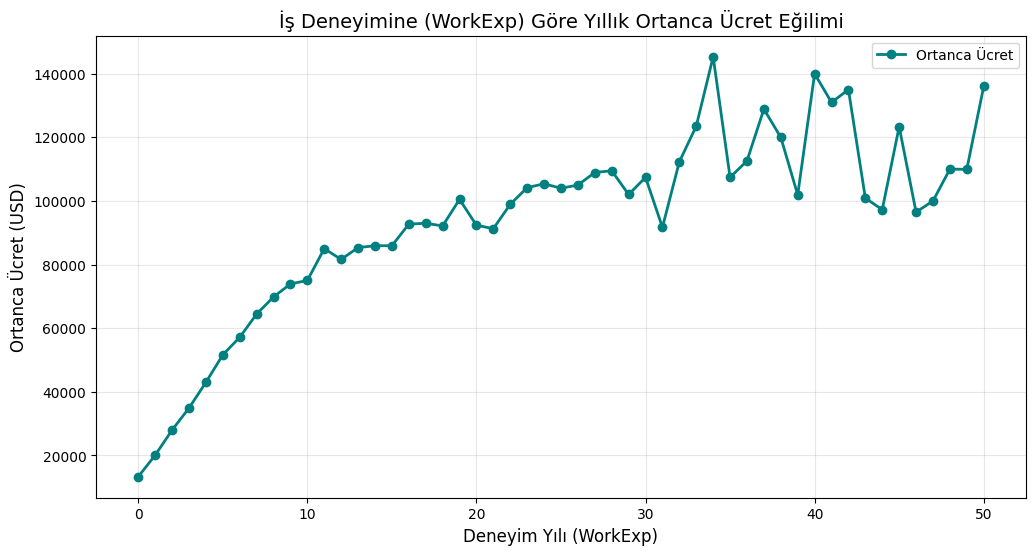

In [20]:
# --- 3.1: Deneyim Seviyesine (WorkExp) Göre Ortanca Ücret ---
# SQL ile ham veriyi çekip Pandas ile Median (Ortanca) hesaplıyoruz
query_comp = """
SELECT WorkExp, ConvertedCompYearly
FROM survey_table
WHERE WorkExp IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""
df_comp_raw = pd.read_sql_query(query_comp, conn)

# Gruplayıp Ortanca alalım
df_comp_trend = df_comp_raw.groupby('WorkExp')['ConvertedCompYearly'].median().reset_index()

# Görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(df_comp_trend['WorkExp'], df_comp_trend['ConvertedCompYearly'], 
         marker='o', color='teal', linewidth=2, label='Ortanca Ücret')

plt.title('İş Deneyimine (WorkExp) Göre Yıllık Ortanca Ücret Eğilimi', fontsize=14)
plt.xlabel('Deneyim Yılı (WorkExp)', fontsize=12)
plt.ylabel('Ortanca Ücret (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()



***2. Deneyim Seviyelerine Göre İş Memnuniyetinin (JobSatPoints_6) Çizgi Grafiği***
Deneyim seviyesine bağlı olarak iş memnuniyetindeki (JobSatPoints_6) eğilimleri incelemek için bir çizgi grafiği oluşturun.

Bu grafik, memnuniyetin zaman içinde deneyimle nasıl ilişkili olduğuna dair fikir verecektir.

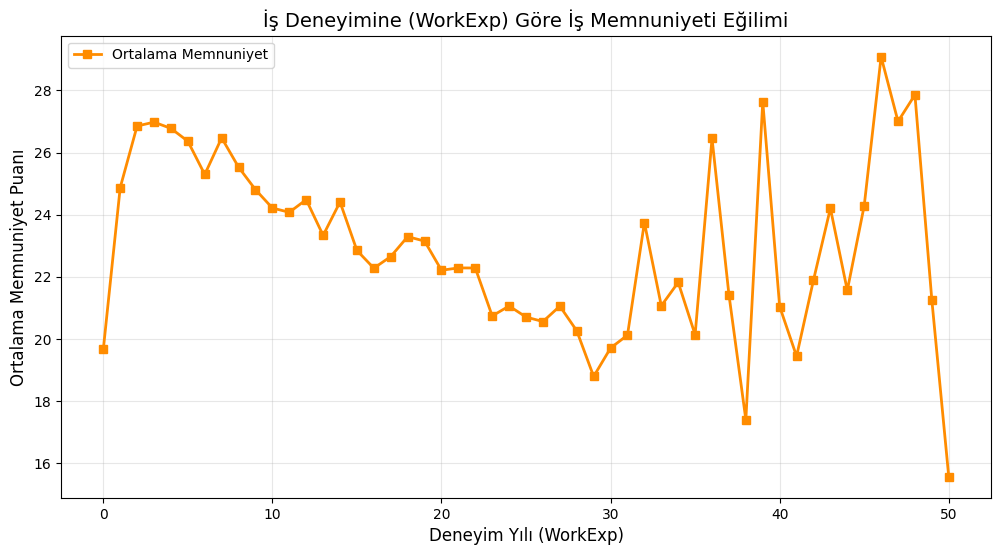

In [21]:
# --- 3.2: Deneyim Seviyesine (WorkExp) Göre İş Memnuniyeti (JobSatPoints_6) ---
query_sat = """
SELECT WorkExp, AVG(JobSatPoints_6) as Ortalama_Memnuniyet
FROM survey_table
WHERE WorkExp IS NOT NULL AND JobSatPoints_6 IS NOT NULL
GROUP BY WorkExp
ORDER BY WorkExp
"""
df_sat_trend = pd.read_sql_query(query_sat, conn)

# Görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(df_sat_trend['WorkExp'], df_sat_trend['Ortalama_Memnuniyet'], 
         marker='s', color='darkorange', linewidth=2, label='Ortalama Memnuniyet')

plt.title('İş Deneyimine (WorkExp) Göre İş Memnuniyeti Eğilimi', fontsize=14)
plt.xlabel('Deneyim Yılı (WorkExp)', fontsize=12)
plt.ylabel('Ortalama Memnuniyet Puanı', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

conn.close()